# NodeMCUMQTTData

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Reading WiSenseData

In [2]:
#reading the Outdoor dataset
dff = pd.read_csv('NodeMCUMQTTData.csv' , header = None)

In [3]:
#Printing first five rows of dataset
dff.head()

,0,1,2,3,4,5,6,7
0,2019-01-04 23:40:15,013X_A6EPLX_NS,8.23,54.67,905.69,7.50,13.21,7.10
1,2019-01-04 23:40:15,017X_A81PLX_ND,11.40,55.21,903.73,10.88,12.85,6.46
2,2019-01-04 23:40:15,023X_A7EG2X_NB,7.40,74.81,907.37,7.25,12.55,8.54
3,2019-01-04 23:42:27,012X_MEDL2X_NB,8.84,63.57,906.57,6.94,17.95,6.45
4,2019-01-04 23:47:06,023X_A7EG2X_NB,7.42,74.81,907.49,7.06,20.65,8.54


In [4]:
#There are 8 columns
dff.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

# 3. Renaming the Columns

In [5]:
df = dff.rename(columns={0: 'timeStamp', 1: 'nodeName' , 2: 'BME280_Temp', 3: 'BME280_Hum' , 4: 'BME280_Pres' , 5 : 'DS18B20_Temp' , 6: 'LM35_Temp' , 7 : 'Battery_Vol' })

In [6]:
#Printing first five rows of dataset
df.head()

,timeStamp,nodeName,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
0,2019-01-04 23:40:15,013X_A6EPLX_NS,8.23,54.67,905.69,7.50,13.21,7.10
1,2019-01-04 23:40:15,017X_A81PLX_ND,11.40,55.21,903.73,10.88,12.85,6.46
2,2019-01-04 23:40:15,023X_A7EG2X_NB,7.40,74.81,907.37,7.25,12.55,8.54
3,2019-01-04 23:42:27,012X_MEDL2X_NB,8.84,63.57,906.57,6.94,17.95,6.45
4,2019-01-04 23:47:06,023X_A7EG2X_NB,7.42,74.81,907.49,7.06,20.65,8.54


In [7]:
#Printing last five rows of dataset
df.tail()

,timeStamp,nodeName,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
189834,2019-05-16 10:23:39,028X_MEDL3X_NS,23.79,41.16,901.33,27.56,0.00,7.71
189835,2019-05-16 10:24:01,021X_A62COX_ND,23.86,48.70,902.81,23.00,23.05,0.00
189836,2019-05-16 10:24:53,014X_A51LiX_ND,24.12,55.89,901.48,23.31,1.15,0.00
189837,2019-05-16 10:25:16,015X_A8GL1X_ND,23.08,53.67,898.05,23.56,22.15,0.00
189838,2019-05-16 10:25:31,017X_A81PLX_ND,22.88,59.77,899.21,22.13,23.95,0.00


In [60]:
#Copying the original dataset ('df') into data1
data1 = df.copy()  

In [36]:
# Getting some info about Dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189839 entries, 0 to 189838
Data columns (total 8 columns):
timeStamp       189839 non-null object
nodeName        189839 non-null object
BME280_Temp     189839 non-null float64
BME280_Hum      189839 non-null float64
BME280_Pres     189839 non-null float64
DS18B20_Temp    189839 non-null float64
LM35_Temp       189839 non-null float64
Battery_Vol     189839 non-null float64
dtypes: float64(6), object(2)
memory usage: 11.6+ MB


In [11]:
#Describing different features of DataSet
data1.describe()

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
count,189839.000000,189839.000000,189839.000000,189839.000000,189839.000000,189839.000000
mean,17.663399,56.987702,901.555945,15.383829,8.623787,2.688006
std,7.022064,16.766289,5.231238,7.815883,9.736203,3.502019
min,-0.590000,8.770000,-208.750000,-1.370000,0.000000,0.000000
25%,13.410000,43.820000,898.770000,10.500000,0.000000,0.000000
50%,17.740000,54.700000,901.530000,16.120000,0.850000,0.000000
75%,22.350000,68.495000,904.640000,20.750000,18.850000,6.790000
max,62.390000,100.000000,1137.130000,54.310000,34.150000,11.750000


In [12]:
#where BME280_Pres < 40 , Basically an Outlier
np.where(data1.BME280_Pres < 40)

(array([ 24755, 128747]),)

In [13]:
#Printing dataset between given range
data1[24755:24760]

,timeStamp,nodeName,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
24755,2019-01-16 18:56:29,NodeMCU_01,18.32,100.00,-208.75,0.00,0.00,0.0
24756,2019-01-16 18:56:39,025X_A61BLX_ND,16.65,44.57,903.67,15.81,18.25,0.0
24757,2019-01-16 18:56:43,017X_A81PLX_ND,12.49,59.05,902.01,12.00,14.35,0.0
24758,2019-01-16 18:57:58,021X_A62COX_ND,17.05,45.62,905.62,16.19,16.75,0.0
24759,2019-01-16 18:58:27,015X_A8GL1X_ND,19.72,38.99,900.65,20.00,18.85,0.0


In [14]:
#Getting total number of Unique Nodes from the DataSet

data1.groupby('nodeName').count()


,timeStamp,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
nodeName,,,,,,,
001X_GARPAX_ND,5765,5765,5765,5765,5765,5765,5765
003X_AMRC1X_ND,11223,11223,11223,11223,11223,11223,11223
004X_AMRC2X_ND,29951,29951,29951,29951,29951,29951,29951
011X_MEDL1X_NB,19253,19253,19253,19253,19253,19253,19253
012X_MEDL2X_NB,22597,22597,22597,22597,22597,22597,22597
013X_A6EPLX_NS,8443,8443,8443,8443,8443,8443,8443
014X_A51LiX_ND,10063,10063,10063,10063,10063,10063,10063
015X_A8GL1X_ND,10006,10006,10006,10006,10006,10006,10006
016X_A1NKNX_ND,189,189,189,189,189,189,189


# Plotting Graphs

In [22]:
data = df.copy()  #'data'is used to plot the raw data
data['timeStamp'] = pd.to_datetime(data['timeStamp']) # Changing 'timeStamp' to datetime

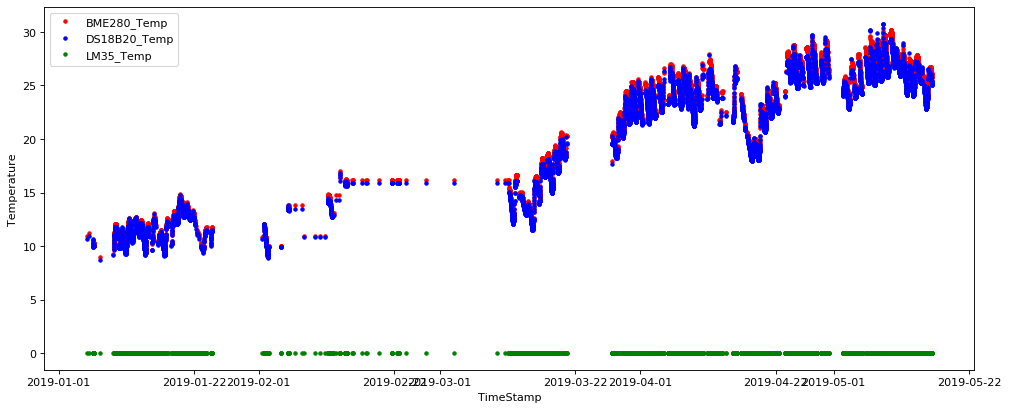

In [23]:
#Graph of temperatures for node 001X_GARPAX_ND Original DataSet
x = []
y_BME280_Temp = []
y_DS18B20_Temp = []
y_LM35_Temp = []
#n = []
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
for index, row in data.iterrows():
    if ( row['nodeName'] == '001X_GARPAX_ND' ):
        x.append(row['timeStamp'])
        y_BME280_Temp.append(row['BME280_Temp'])
        y_DS18B20_Temp.append(row['DS18B20_Temp'])
        y_LM35_Temp.append(row['LM35_Temp'])
        #n.append(row['nodeAddress'])
        #print (row["nodeAddress"], row["temperature1"])
        
plt.plot(x,y_BME280_Temp , '.r', label='BME280_Temp')
plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


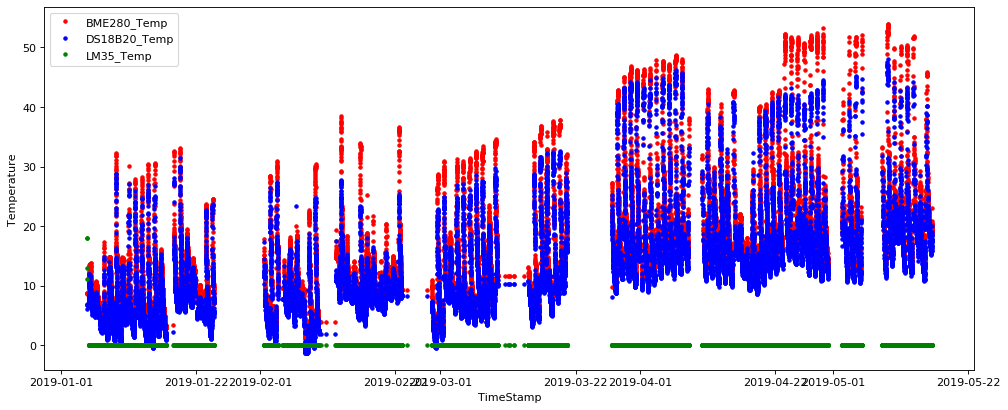

In [24]:
#Graph of temperatures for node 012X_MEDL2X_NB Original DataSet
x = []
y_BME280_Temp = []
y_DS18B20_Temp = []
y_LM35_Temp = []
#n = []
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
for index, row in data.iterrows():
    if ( row['nodeName'] == '012X_MEDL2X_NB' ):
        x.append(row['timeStamp'])
        y_BME280_Temp.append(row['BME280_Temp'])
        y_DS18B20_Temp.append(row['DS18B20_Temp'])
        y_LM35_Temp.append(row['LM35_Temp'])
        #n.append(row['nodeAddress'])
        #print (row["nodeAddress"], row["temperature1"])
        
plt.plot(x,y_BME280_Temp , '.r', label='BME280_Temp')
plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


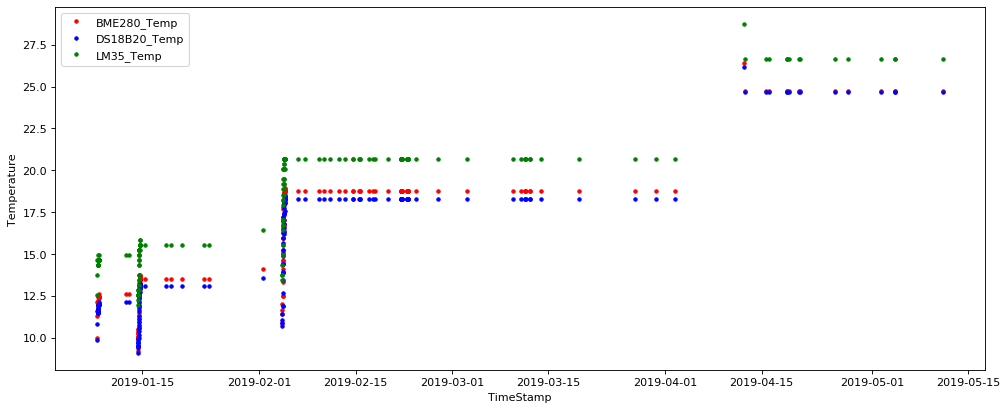

In [25]:
#Graph of temperatures for node 016X_A1NKNX_ND Original DataSet
x = []
y_BME280_Temp = []
y_DS18B20_Temp = []
y_LM35_Temp = []
#n = []
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
for index, row in data.iterrows():
    if ( row['nodeName'] == '016X_A1NKNX_ND' ):
        x.append(row['timeStamp'])
        y_BME280_Temp.append(row['BME280_Temp'])
        y_DS18B20_Temp.append(row['DS18B20_Temp'])
        y_LM35_Temp.append(row['LM35_Temp'])
        #n.append(row['nodeAddress'])
        #print (row["nodeAddress"], row["temperature1"])
        
plt.plot(x,y_BME280_Temp , '.r', label='BME280_Temp')
plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


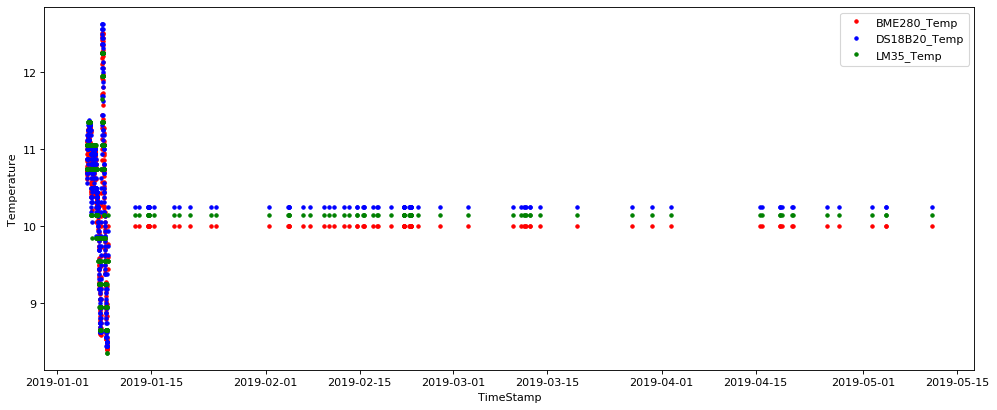

In [26]:
#Graph of temperatures for node 020X_SPCOMX_ND Original DataSet
x = []
y_BME280_Temp = []
y_DS18B20_Temp = []
y_LM35_Temp = []
#n = []
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
for index, row in data.iterrows():
    if ( row['nodeName'] == '020X_SPCOMX_ND' ):
        x.append(row['timeStamp'])
        y_BME280_Temp.append(row['BME280_Temp'])
        y_DS18B20_Temp.append(row['DS18B20_Temp'])
        y_LM35_Temp.append(row['LM35_Temp'])
        #n.append(row['nodeAddress'])
        #print (row["nodeAddress"], row["temperature1"])
        
plt.plot(x,y_BME280_Temp , '.r', label='BME280_Temp')
plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


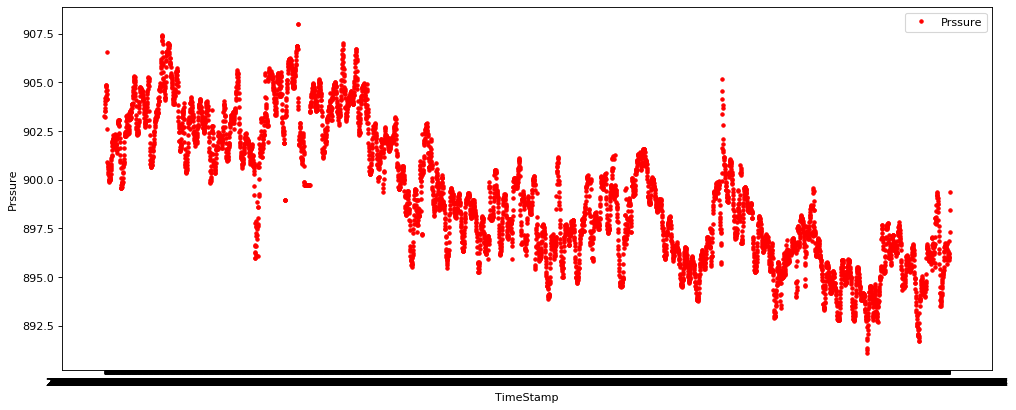

In [20]:
#Graph of pressure for node 001X_GARPAX_ND Original DataSet
x = []
y_BME280_Pres = []
#y_DS18B20_Temp = []
#y_LM35_Temp = []
#n = []
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
for index, row in data.iterrows():
    if ( row['nodeName'] == '001X_GARPAX_ND' ):
        x.append(row['timeStamp'])
        y_BME280_Pres.append(row['BME280_Pres'])
        #y_DS18B20_Temp.append(row['DS18B20_Temp'])
        #y_LM35_Temp.append(row['LM35_Temp'])
        #n.append(row['nodeAddress'])
        #print (row["nodeAddress"], row["temperature1"])
        
plt.plot(x,y_BME280_Pres , '.r', label='Prssure')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Prssure')
plt.legend()
plt.show()
#print(n)


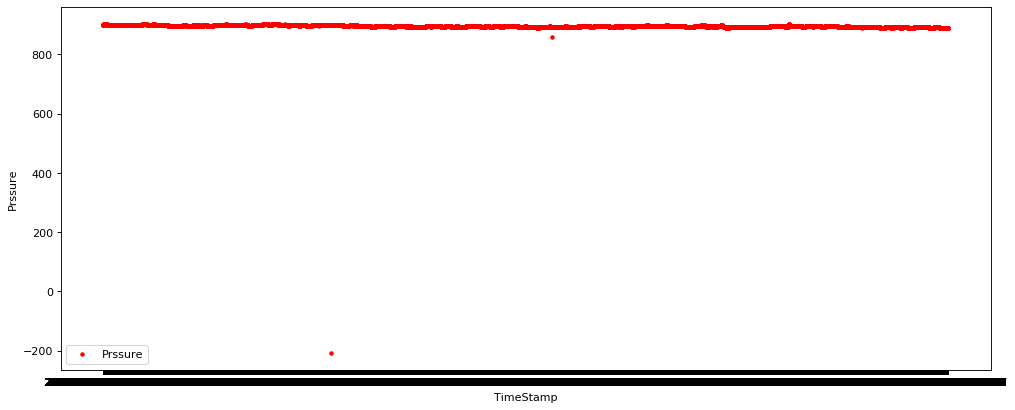

In [23]:
#NodeMCU_01

#Graph of pressure for node NodeMCU_01 Original DataSet
x = []
y_BME280_Pres = []
#y_DS18B20_Temp = []
#y_LM35_Temp = []
#n = []
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
for index, row in data.iterrows():
    if ( row['nodeName'] == 'NodeMCU_01' ):
        x.append(row['timeStamp'])
        y_BME280_Pres.append(row['BME280_Pres'])
        #y_DS18B20_Temp.append(row['DS18B20_Temp'])
        #y_LM35_Temp.append(row['LM35_Temp'])
        #n.append(row['nodeAddress'])
        #print (row["nodeAddress"], row["temperature1"])
        
plt.plot(x,y_BME280_Pres , '.r', label='Prssure')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Prssure')
plt.legend()
plt.show()
#print(n)


# -----------------------------------------------------------

In [15]:
#Describing different features of DataSet
data1.describe()   

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
count,189839.000000,189839.000000,189839.000000,189839.000000,189839.000000,189839.000000
mean,17.663399,56.987702,901.555945,15.383829,8.623787,2.688006
std,7.022064,16.766289,5.231238,7.815883,9.736203,3.502019
min,-0.590000,8.770000,-208.750000,-1.370000,0.000000,0.000000
25%,13.410000,43.820000,898.770000,10.500000,0.000000,0.000000
50%,17.740000,54.700000,901.530000,16.120000,0.850000,0.000000
75%,22.350000,68.495000,904.640000,20.750000,18.850000,6.790000
max,62.390000,100.000000,1137.130000,54.310000,34.150000,11.750000


In [16]:
#Getting total number of Unique Nodes from the DataSet
data1.groupby('nodeName').count()   

,timeStamp,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
nodeName,,,,,,,
001X_GARPAX_ND,5765,5765,5765,5765,5765,5765,5765
003X_AMRC1X_ND,11223,11223,11223,11223,11223,11223,11223
004X_AMRC2X_ND,29951,29951,29951,29951,29951,29951,29951
011X_MEDL1X_NB,19253,19253,19253,19253,19253,19253,19253
012X_MEDL2X_NB,22597,22597,22597,22597,22597,22597,22597
013X_A6EPLX_NS,8443,8443,8443,8443,8443,8443,8443
014X_A51LiX_ND,10063,10063,10063,10063,10063,10063,10063
015X_A8GL1X_ND,10006,10006,10006,10006,10006,10006,10006
016X_A1NKNX_ND,189,189,189,189,189,189,189


In [61]:
#Converting datatype of 'timeStamp' to datetime type
data1['timeStamp'] = pd.to_datetime(data1['timeStamp'])  

In [62]:
#Now we can se the data type of 'timeStamp', it is now datetime type
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189839 entries, 0 to 189838
Data columns (total 8 columns):
timeStamp       189839 non-null datetime64[ns]
nodeName        189839 non-null object
BME280_Temp     189839 non-null float64
BME280_Hum      189839 non-null float64
BME280_Pres     189839 non-null float64
DS18B20_Temp    189839 non-null float64
LM35_Temp       189839 non-null float64
Battery_Vol     189839 non-null float64
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.6+ MB


In [63]:
# Now We will create four new columns in our Dataset namely, 'BME280_Temp_changed', 'DS18B20_Temp_changed' , 'LM35_Temp_changed' and 'BME280_Pres_changed'
# These column will contain value '1' if changed else it will contain 0
data1['BME280_Temp_changed'] = 0
data1['DS18B20_Temp_changed'] = 0
data1['LM35_Temp_changed'] = 0
data1['BME280_Pres_changed'] = 0



In [64]:
# Grouping the DataSet by 'BME280_Temp_changed'
data1.groupby('BME280_Temp_changed').count()

,timeStamp,nodeName,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol,DS18B20_Temp_changed,LM35_Temp_changed,BME280_Pres_changed
BME280_Temp_changed,,,,,,,,,,,
0,189839,189839,189839,189839,189839,189839,189839,189839,189839,189839,189839


# Following is the function to clean 'temperature3' and 'pressure'

# Logic behind cleaning the data

Example: Cleaning temperature1

To clean 'temperature1', we'll iterate through this column and select two values(rows) of a particular node and compare it.
1. If there absolute difference is more than 10C and timeinterval is less than 30 minutes then we'll replace later value with previous one.
2. If later value(row) is showing an Outlier and time interval is more than 30 minutes then will just replace it with 'NaN'.

Same logic is Implemented for 'temperature3' and pressure.


In [65]:
#Checking Outliers
'''
# Following Scripts will deal with first value of each node if it is outlier

1. We'll just check if first value of each node for a particular column is outlier (i.e temperature > 100 or temperature < 0), if it is outlier then we'll change its value to next row value

'''


from tqdm import tqdm_notebook

nodes = data1['nodeName'].unique() # this line will create an array having total unique nodes

print('Checking Outlier for BME280_Temp')
for n in tqdm_notebook(nodes , desc = 'Processing records for Outlier'):
    for i in range(data1.shape[0] - 1):
        if(data1.loc[i , 'nodeName'] == n):
            val0 = float(data1.loc[i,'BME280_Temp'])
            if(val0 < 0 or val0 > 100):
                data1.loc[i,'BME280_Temp'] = data1.loc[i+1,'BME280_Temp']
                print('Outlier Found at', i , 'for node' , n)
                break
            else:
                break

print('Checking Outlier for DS18B20_Temp')                
for n in tqdm_notebook(nodes , desc = 'Processing records for Outlier'):
    for i in range(data1.shape[0] - 1):
        if(data1.loc[i , 'nodeName'] == n):
            val0 = float(data1.loc[i,'DS18B20_Temp'])
            if(val0 < 0 or val0 > 100):
                data1.loc[i,'DS18B20_Temp'] = data1.loc[i+1,'DS18B20_Temp']
                print('Outlier Found at',i, 'for node' , n)
                break
            else:
                break
                
                
print('Checking Outlier for LM35_Temp')                
for n in tqdm_notebook(nodes , desc = 'Processing records for Outlier'):
    for i in range(data1.shape[0] - 1):
        if(data1.loc[i , 'nodeName'] == n):
            val0 = float(data1.loc[i,'LM35_Temp'])
            if(val0 < 0 or val0 > 100):
                data1.loc[i,'LM35_Temp'] = data1.loc[i+1,'LM35_Temp']
                print('Outlier Found at',i, 'for node' , n)
                break
            else:
                break
                
                
print('Checking Outlier for BME280_Pres')
for n in tqdm_notebook(nodes , desc = 'Processing records for Outlier'):
    for i in range(data1.shape[0] - 1):
        if(data1.loc[i , 'nodeName'] == n):
            val0 = float(data1.loc[i,'BME280_Pres'])
            if(val0 < 750 or val0 > 1000):
                data1.loc[i,'BME280_Pres'] = data1.loc[i+1,'BME280_Pres']
                print('Outlier Found at',i, 'for node' , n)
                break
            else:
                break

                


Checking Outlier for BME280_Temp


Checking Outlier for DS18B20_Temp


Checking Outlier for LM35_Temp


Checking Outlier for BME280_Pres


In [59]:
df.head()

,timeStamp,nodeName,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
0,2019-01-04 23:40:15,013X_A6EPLX_NS,8.23,54.67,905.69,7.50,13.21,7.10
1,2019-01-04 23:40:15,017X_A81PLX_ND,11.40,55.21,903.73,10.88,12.85,6.46
2,2019-01-04 23:40:15,023X_A7EG2X_NB,7.40,74.81,907.37,7.25,12.55,8.54
3,2019-01-04 23:42:27,012X_MEDL2X_NB,8.84,63.57,906.57,6.94,17.95,6.45
4,2019-01-04 23:47:06,023X_A7EG2X_NB,7.42,74.81,907.49,7.06,20.65,8.54


In [27]:
df.groupby('nodeName').count()

,timeStamp,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
nodeName,,,,,,,
001X_GARPAX_ND,5765,5765,5765,5765,5765,5765,5765
003X_AMRC1X_ND,11223,11223,11223,11223,11223,11223,11223
004X_AMRC2X_ND,29951,29951,29951,29951,29951,29951,29951
011X_MEDL1X_NB,19253,19253,19253,19253,19253,19253,19253
012X_MEDL2X_NB,22597,22597,22597,22597,22597,22597,22597
013X_A6EPLX_NS,8443,8443,8443,8443,8443,8443,8443
014X_A51LiX_ND,10063,10063,10063,10063,10063,10063,10063
015X_A8GL1X_ND,10006,10006,10006,10006,10006,10006,10006
016X_A1NKNX_ND,189,189,189,189,189,189,189


In [21]:
nodes = data1['nodeName'].unique() # this line will create an array having total unique nodes

from tqdm import tqdm_notebook

#Function to clean 'BME280_Temp'

def BME280_Temp_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeName'] == n):
            val0 = float(df.loc[i,'BME280_Temp'])
            time0 = (df.loc[i,'timeStamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeName'] == n):
                val1 = float(df.loc[j , 'BME280_Temp'])
                time1 = (df.loc[j , 'timeStamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'BME280_Temp'] = val0
                  df.loc[j, 'BME280_Temp_changed'] = 1
                  k = j
                  break
                elif(((val1) > 100 or (val1) < 0 ) and minutes > 30.0):
                  df.loc[j,'BME280_Temp'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break
                    
                    
#Function to clean 'DS18B20_Temp'

def DS18B20_Temp_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeName'] == n):
            val0 = float(df.loc[i,'DS18B20_Temp'])
            time0 = (df.loc[i,'timeStamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeName'] == n):
                val1 = float(df.loc[j , 'DS18B20_Temp'])
                time1 = (df.loc[j , 'timeStamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'DS18B20_Temp'] = val0
                  df.loc[j, 'DS18B20_Temp_changed'] = 1
                  k = j
                  break
                elif(((val1) > 100 or (val1) < 0 ) and minutes > 30.0):
                  df.loc[j,'DS18B20_Temp'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break
                    
                    
#Function to clean 'LM35_Temp'

def LM35_Temp_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeName'] == n):
            val0 = float(df.loc[i,'LM35_Temp'])
            time0 = (df.loc[i,'timeStamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeName'] == n):
                val1 = float(df.loc[j , 'LM35_Temp'])
                time1 = (df.loc[j , 'timeStamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'LM35_Temp'] = val0
                  df.loc[j, 'LM35_Temp_changed'] = 1
                  k = j
                  break
                elif(((val1) > 100 or (val1) < 0 ) and minutes > 30.0):
                  df.loc[j,'LM35_Temp'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break                    
                    
                    
                    
# Function to clean 'pressure'

def BME280_Pres_clean(df):
    for n in tqdm_notebook(nodes , desc = 'Processing records'):
    #for n in nodes:
        k = 0
        for i in range(k , df.shape[0]-1):
          if(df.loc[i, 'nodeName'] == n):
            val0 = float(df.loc[i,'BME280_Pres'])
            time0 = (df.loc[i,'timeStamp' ])
            for j in range(i+1, df.shape[0]-1):
              if(df.loc[j, 'nodeName'] == n):
                val1 = float(df.loc[j , 'BME280_Pres'])
                time1 = (df.loc[j , 'timeStamp'])
                timedelta = time1 - time0
                minutes = timedelta.total_seconds() / 60
                
                if (abs(val1 - val0) > 10 and minutes < 30.0):
                  df.loc[j,'BME280_Pres'] = val0
                  df.loc[j, 'BME280_Pres_changed'] = 1
                  k = j
                  break
                elif(((val1) > 1000 or (val1) < 750 ) and minutes > 30.0):
                  df.loc[j,'BME280_Pres'] = 'NaN'
                  k = j
                  break
                else:
                  k = j
                  break

In [22]:
#Call Above functions to clean the dataset
BME280_Temp_clean(data1)
DS18B20_Temp_clean(data1)
LM35_Temp_clean(data1)
BME280_Pres_clean(data1)

In [23]:
data1['BME280_Temp'] = data1['BME280_Temp'].astype('float64')
data1['DS18B20_Temp'] = data1['DS18B20_Temp'].astype('float64')
data1.describe() #Cleaned Data

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol,BME280_Temp_changed,DS18B20_Temp_changed,LM35_Temp_changed,BME280_Pres_changed
count,189838.000000,189839.000000,189839.000000,189835.000000,189839.000000,189839.000000,189839.000000,189839.000000,189839.0,189839.000000
mean,17.716157,56.987702,901.509504,15.410413,8.623787,2.688006,0.002602,0.004409,0.0,0.004182
std,7.142576,16.766289,4.094513,7.857773,9.736203,3.502019,0.050946,0.066254,0.0,0.064537
min,-0.590000,8.770000,879.070000,-1.370000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,13.420000,43.820000,898.730000,10.560000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,17.750000,54.700000,901.490000,16.120000,0.850000,0.000000,0.000000,0.000000,0.0,0.000000
75%,22.370000,68.495000,904.620000,20.750000,18.850000,6.790000,0.000000,0.000000,0.0,0.000000
max,62.390000,100.000000,919.600000,54.310000,34.150000,11.750000,1.000000,1.000000,0.0,1.000000


In [24]:
df.describe() #Raw Data

,BME280_Temp,BME280_Hum,BME280_Pres,DS18B20_Temp,LM35_Temp,Battery_Vol
count,189839.000000,189839.000000,189839.000000,189839.000000,189839.000000,189839.000000
mean,17.663399,56.987702,901.555945,15.383829,8.623787,2.688006
std,7.022064,16.766289,5.231238,7.815883,9.736203,3.502019
min,-0.590000,8.770000,-208.750000,-1.370000,0.000000,0.000000
25%,13.410000,43.820000,898.770000,10.500000,0.000000,0.000000
50%,17.740000,54.700000,901.530000,16.120000,0.850000,0.000000
75%,22.350000,68.495000,904.640000,20.750000,18.850000,6.790000
max,62.390000,100.000000,1137.130000,54.310000,34.150000,11.750000


In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189839 entries, 0 to 189838
Data columns (total 12 columns):
timeStamp               189839 non-null datetime64[ns]
nodeName                189839 non-null object
BME280_Temp             189838 non-null float64
BME280_Hum              189839 non-null float64
BME280_Pres             189839 non-null float64
DS18B20_Temp            189839 non-null object
LM35_Temp               189839 non-null float64
Battery_Vol             189839 non-null float64
BME280_Temp_changed     189839 non-null int64
DS18B20_Temp_changed    189839 non-null int64
LM35_Temp_changed       189839 non-null int64
BME280_Pres_changed     189839 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(4), object(2)
memory usage: 17.4+ MB


/home/kaish114/.local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


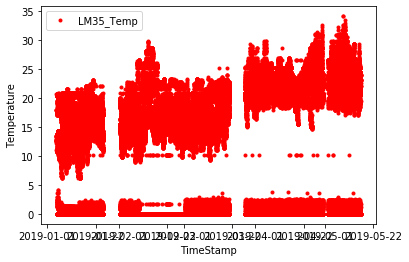

In [50]:
plt.plot(data1.timeStamp,data1.LM35_Temp , '.r', label='LM35_Temp')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)


/home/kaish114/.local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


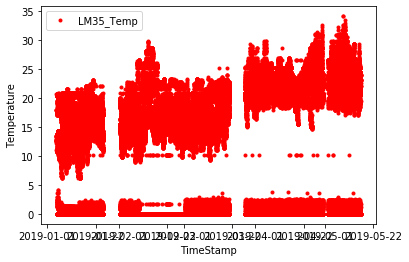

In [8]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
plt.plot(df.timeStamp,df.LM35_Temp , '.r', label='LM35_Temp')
#plt.plot(x,y_DS18B20_Temp, '.b', label='DS18B20_Temp')
#plt.plot(x , y_LM35_Temp, '.g', label='LM35_Temp' )
plt.xlabel('TimeStamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()
#print(n)
